# *Metropolis Monte Carlo Algorithm for Creating The Normal Distribution*

### **importing the modules and packages, Configuration of the Figs**

In [39]:
include("Q3-Metropolis-MC.jl")
using Plots, LaTeXStrings, StatsPlots, StatsBase, Distributions, JLD, ProgressMeter
figpath = "../../Figs/Q3/"
datapath = "../../Data/Q3/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

### *Showing the Distribution*

In [15]:
Parameters = Dict(
    :P => x -> ℯ^(-x^2 / 2),
    :x₀ => 0.0,
    :Δ => 2.94,
    :Steps => 10^6)

Series, aᵣ = Metropolis.metropolis(; Parameters...)
save(datapath * "Fig1_data.jld", "Series", Series)

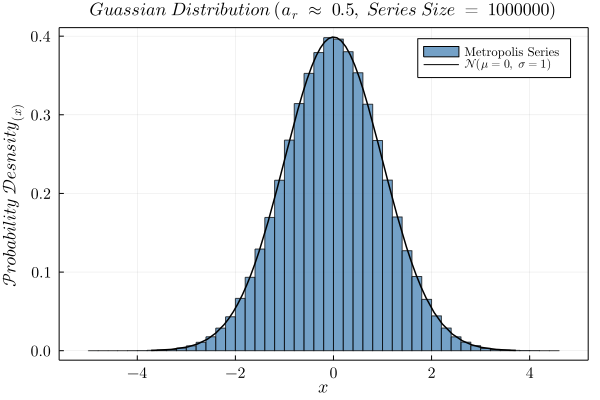

In [40]:
NormalHist = begin
    histogram(Series, bins = 75, normalize = true, c = :steelblue, label = "Metropolis Series", alpha = 0.75)
    plot!(Normal(0, 1), label = L"\mathcal{N}(\mu =0 ,\ \sigma =1)", c = :black, linewidth = 1.5)
    plot!(xlabel = L"x", ylabel = L"\mathcal{Probability\ Desnsity}_{(x)}",
        title = L"Guassian\ Distribution\ (a_r\ \approx\ 0.5,\ Series\ Size\ =\ %$(Parameters[:Steps]))")
end
savefig(NormalHist, figpath * "NormalHist.pdf")
NormalHist

In [30]:
N = 1000
aᵣData = Float64[]
ΔList = collect(range(0.01, 100, length = N))
Prog = Progress(N)
for n ∈ 1:N
    Parameters = Dict(
        :P => x -> ℯ^(-x^2 / 2),
        :x₀ => 0.0,
        :Δ => aᵣList[n],
        :Steps => 10^6)
    push!(aᵣData, Metropolis.metropolis(; Parameters...)[2])
    next!(Prog)
end
save(datapath * "ar_data.jld", "aᵣ", [ΔList aᵣData])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


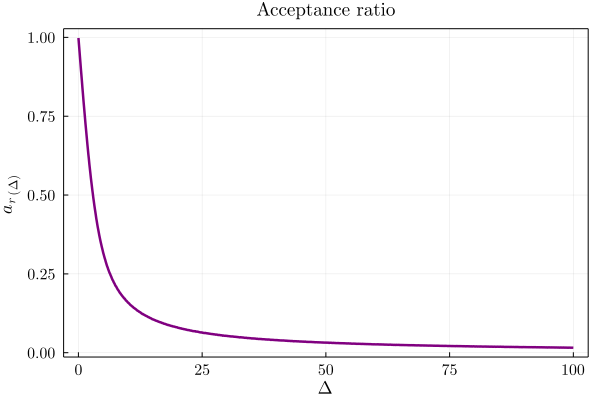

In [38]:
aᵣplot = plot(ΔList, aᵣData, xlabel = L"\Delta", ylabel = L"{a_r}_{(\Delta)}", title = "Acceptance ratio", c = :purple, linewidth = 2.5)
savefig(aᵣplot, figpath * "AcceptanceRatio.pdf")
aᵣplot

In [ ]:
# plot(autocor(Metropolis(x -> ℯ^(-x^2 / 2))[1]))